In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#生成数据
X=[[0,0],[0,1],[1,0],[1,1]]
Y=[[0],[1],[1],[0]]
X=np.array(X).astype('int16')
Y=np.array(Y).astype('int16')
lr = 0.001

In [2]:
#设置权重和偏执
W1 = np.random.rand(2,2) * 0.01
W2 = np.random.rand(1,2) * 0.01
b1 = np.random.rand(2,1) * 0.01
b2 = np.random.rand(1,1) * 0.01
print("W1.shape",W1.shape)
print("W2.shape",W2.shape)

W1.shape (2, 2)
W2.shape (1, 2)


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ratio(x):
    return x*(1-x)

In [4]:
def train(X,y):
    global W1,W2,b1,b2
    #print(X.shape)
    #print(np.dot(W1,X).shape)
    a = sigmoid(np.dot(W1,X)+b1)    
   # print("a.shape",a.shape)
    y_hat = sigmoid(np.dot(W2,a)+b2)
    
    #print("a.shape",a.shape)
    #print("y_hat.shape",y_hat.shape)
    
    error = np.fabs(y_hat - y)
    dW2 = (y_hat - y) * a
    db2 = (y_hat - y) 
    dz = dW2 * ratio(a)
    db1 = dz
    dW1 = X * dz.T
    
    
    #print("dW2.shape",dW2.shape)
    #print("dW1.shape",dW1.shape)
    
    W2 -= lr * dW2.T
    W1 -= lr * dW1.T
    b2 -= lr * db2
    b1 -= lr * db1
    
    #print("Error: ",error)
    return error

In [5]:
f = open('data.csv','w',encoding='utf8')
counter = 0
for i in range(10000):
    for j in range(4):
        X_temp = np.resize(np.array(X[j].T),(2,1))
        Y_temp = np.resize(np.array(Y[j]),(1,1))
        er = train(X_temp,Y_temp)
        
        content = str(counter)+','+str(float(er))+'\n'
        print(content)
        f_a = f.write(content)
        counter += 1
f.close()        

0,0.5033038744845544

1,0.4968836303616212

2,0.4966964438643905

3,0.5034927064298633

4,0.5032988929679414

5,0.49688861471671675

6,0.496701425238841

7,0.5034877217297202

8,0.5032939189563889

9,0.49689359156094215

10,0.4967063991068542

11,0.5034827445424508

12,0.5032889524385756

13,0.4968985609056319

14,0.49671136547975814

15,0.5034777748567135

16,0.503283993403198

17,0.49690352276210326

18,0.4967163243688629

19,0.5034728126611836

20,0.5032790418389687

21,0.4969084771416563

22,0.49672127578546243

23,0.5034678579445541

24,0.5032740977346178

25,0.49691342405557426

26,0.49672621974083264

27,0.5034629106955344

28,0.5032691610788929

29,0.496918363515123

30,0.4967311562462332

31,0.5034579709028515

32,0.5032642318605577

33,0.49692329553155135

34,0.49673608531290614

35,0.5034530385552494

36,0.5032593100683935

37,0.4969282201160914

38,0.4967410069520767

39,0.5034481136414891

40,0.5032543956911986

41,0.496933137279958

42,0.4967459211749533

43,0.50344319615

364,0.5028799589075947

365,0.4973077819770927

366,0.4971203416034652

367,0.5030685307988368

368,0.5028756160030295

369,0.49731212724197793

370,0.49712468426476353

371,0.5030641853442162

372,0.5028712796403355

373,0.49731646596026324

374,0.4971290203833232

375,0.5030598464376269

376,0.5028669498096475

377,0.4973207981418247

378,0.49713334996901415

379,0.503055514069188

380,0.502862626501115

381,0.49732512379652316

382,0.49713767303169165

383,0.5030511882290328

384,0.5028583097049024

385,0.49732944293420467

386,0.49714198958119593

387,0.5030468689073102

388,0.502853999411189

389,0.4973337555647005

390,0.49714629962735235

391,0.5030425560941836

392,0.502849695610169

393,0.4973380616978269

394,0.4971506031799713

395,0.5030382497798311

396,0.5028453982920514

397,0.4973423613433854

398,0.4971549002488487

399,0.5030339499544462

400,0.50284110744706

401,0.49734665451116256

402,0.49715919084376514

403,0.5030296566082368

404,0.5028368230654331

405,0.49735

1085,0.49799330459980706

1086,0.4978054525555413

1087,0.5023829926032102

1088,0.5021914831025233

1089,0.4979966172131537

1090,0.49780876317415157

1091,0.5023796799856924

1092,0.5021881771323753

1093,0.4979999248372714

1094,0.497812068806474

1095,0.5023763723581023

1096,0.5021848761407531

1097,0.4980032274796823

1098,0.49781536946002636

1099,0.5023730697129144

1100,0.5021815801201527

1101,0.49800652514789734

1102,0.4978186651423149

1103,0.5023697720426152

1104,0.5021782890630814

1105,0.4980098178494159

1106,0.4978219558608348

1107,0.5023664793397022

1108,0.5021750029620579

1109,0.49801310559172607

1110,0.49782524162306974

1111,0.5023631915966843

1112,0.5021717218096118

1113,0.498016388382305

1114,0.4978285224364922

1115,0.5023599088060816

1116,0.5021684455982847

1117,0.49801966622861793

1118,0.4978317983085635

1119,0.5023566309604259

1120,0.5021651743206288

1121,0.49802293913811924

1122,0.49783506924673315

1123,0.5023533580522598

1124,0.50216190796


1501,0.49831241319627173

1502,0.4981243686743252

1503,0.5020638868178691

1504,0.5018730112342095

1505,0.4983152452263022

1506,0.49812719899292257

1507,0.5020610548421245

1508,0.5018701848257932

1509,0.49831807299157216

1510,0.4981300250492736

1511,0.5020582271315788

1512,0.5018673626731569

1513,0.49832089649850964

1514,0.49813284684980264

1515,0.5020554036798021

1516,0.5018645447698877

1517,0.49832371575353296

1518,0.49813566440092416

1519,0.5020525844803738

1520,0.5018617311095822

1521,0.4983265307630509

1522,0.4981384777090433

1523,0.5020497695268833

1524,0.5018589216858466

1525,0.4983293415334624

1526,0.49814128678055525

1527,0.5020469588129292

1528,0.5018561164922967

1529,0.4983321480711571

1530,0.4981440916218456

1531,0.5020441523321203

1532,0.5018533155225582

1533,0.4983349503825144

1534,0.49814689223929043

1535,0.5020413500780747

1536,0.5018505187702662

1537,0.49833774847390466

1538,0.4981496886392559

1539,0.5020385520444204

1540,0.5018477

2530,0.49872791493909574

2531,0.5014599974580995

2532,0.501270285214543

2533,0.4989182489529471

2534,0.4987298364935453

2535,0.5014580748438581

2536,0.5012683662260836

2537,0.4989201687879229

2538,0.49873175515512136

2539,0.5014561551242872

2540,0.5012664501263309

2541,0.49892208573267716

2542,0.498733670928182

2543,0.5014542382950258

2544,0.5012645369109335

2545,0.4989239997915639

2546,0.4987355838170785

2547,0.5014523243517189

2548,0.5012626265755474

2549,0.49892591096893035

2550,0.49873749382615573

2551,0.5014504132900188

2552,0.5012607191158349

2553,0.4989278192691172

2554,0.4987394009597519

2555,0.5014485051055836

2556,0.5012588145274645

2557,0.498929724696459

2558,0.4987413052221985

2559,0.5014465997940784

2560,0.5012569128061114

2561,0.49893162725528317

2562,0.4987432066178209

2563,0.5014446973511746

2564,0.5012550139474576

2565,0.498933526949911

2566,0.4987451051509376

2567,0.5014427977725503

2568,0.5012531179471914

2569,0.4989354237846570


4030,0.49927884764970687

4031,0.5009087687851285

4032,0.5007200746707189

4033,0.49946869224001167

4034,0.4992799398959086

4035,0.5009076759666006

4036,0.5007189838262045

4037,0.49946978352593263

4038,0.49928103049820116

4039,0.5009065847928915

4040,0.5007178946233529

4041,0.49947087316944716

4042,0.4992821194590601

4043,0.5009054952615245

4044,0.5007168070596928

4045,0.49947196117302783

4046,0.4992832067809565

4047,0.5009044073700265

4048,0.5007157211327564

4049,0.4994730475391438

4050,0.4992842924663582

4051,0.5009033211159284

4052,0.5007146368400797

4053,0.4994741322702605

4054,0.499285376517729

4055,0.5009022364967647

4056,0.500713554179202

4057,0.49947521536883954

4058,0.4992864589375291

4059,0.5009011535100734

4060,0.5007124731476673

4061,0.49947629683733896

4062,0.49928753972821505

4063,0.5009000721533966

4064,0.5007113937430223

4065,0.499477376678213

4066,0.49928861889223985

4067,0.5008989924242798

4068,0.5007103159628178

4069,0.4994784548


5178,0.49953355473579464

5179,0.5006539293040764

5180,0.5004656903139361

5181,0.4997231773894748

5182,0.4995342636541342

5183,0.5006532200192562

5184,0.5004649822805898

5185,0.4997238856974344

5186,0.4995349715056381

5187,0.5006525118018268

5188,0.5004642753126617

5189,0.49972459293953053

5190,0.4995356782919117

5191,0.5006518046501812

5192,0.5004635694085484

5193,0.4997252991173676

5194,0.4995363840145586

5195,0.5006510985627155

5196,0.5004628645666486

5197,0.4997260042325474

5198,0.49953708867517976

5199,0.5006503935378273

5200,0.5004621607853635

5201,0.49972670828666965

5202,0.499537792275374

5203,0.5006496895739173

5204,0.5004614580630969

5205,0.49972741128133136

5206,0.49953849481673707

5207,0.5006489866693883

5208,0.5004607563982549

5209,0.49972811321812727

5210,0.4995391963008631

5211,0.5006482848226457

5212,0.5004600557892457

5213,0.49972881409864967

5214,0.4995398967293433

5215,0.500647584032097

5216,0.5004593562344805

5217,0.49972951392


6479,0.5004715071127065

6480,0.5002835868774623

6481,0.49990535045942597

6482,0.4997163169471258

6483,0.5004710723359103

6484,0.500283152852379

6485,0.49990578464832036

6486,0.49971675084272915

6487,0.5004706382133243

6488,0.5002827194803338

6489,0.4999062181839218

6490,0.4997171840854292

6491,0.5004702047439641

6492,0.5002822867603438

6493,0.4999066510672133

6494,0.4997176166762086

6495,0.5004697719268465

6496,0.5002818546914279

6497,0.499907083299177

6498,0.4997180486160483

6499,0.50046933976099

6500,0.5002814232726064

6501,0.49990751488079266

6502,0.499718479905928

6503,0.5004689082454142

6504,0.5002809925029008

6505,0.4999079458130391

6506,0.49971891054682593

6507,0.5004684773791408

6508,0.5002805623813344

6509,0.49990837609689376

6510,0.49971934053971845

6511,0.5004680471611922

6512,0.5002801329069319

6513,0.4999088057333322

6514,0.4997197698855812

6515,0.5004676175905929

6516,0.5002797040787192

6517,0.4999092347233288

6518,0.499720198585387

7951,0.5003485777875475

7952,0.500160868302564

7953,0.5000281151404902

7954,0.4998389957987006

7955,0.5003483279748372

7956,0.500160618914075

7957,0.5000283646226589

7958,0.4998392450979171

7959,0.5003480785379869

7960,0.500160369900789

7961,0.5000286137294861

7962,0.4998394940220168

7963,0.5003478294764311

7964,0.5001601212621418

7965,0.5000288624615369

7966,0.49983974257156405

7967,0.5003475807896051

7968,0.5001598729975693

7969,0.5000291108193747

7970,0.4998399907471225

7971,0.5003473324769447

7972,0.5001596251065089

7973,0.5000293588035631

7974,0.49984023854925497

7975,0.5003470845378872

7976,0.5001593775883983

7977,0.5000296064146641

7978,0.4998404859785234

7979,0.5003468369718704

7980,0.5001591304426768

7981,0.500029853653239

7982,0.4998407330354886

7983,0.5003465897783328

7984,0.5001588836687836

7985,0.5000301005198486

7986,0.49984097972071106

7987,0.500346342956714

7988,0.5001586372661595

7989,0.5000303470150523

7990,0.49984122603475

7991


9255,0.5002841721750061

9256,0.5000965713755063

9257,0.500092436419195

9258,0.4999032676191467

9259,0.5002840192621754

9260,0.5000964187188693

9261,0.5000925891345231

9262,0.49990342020947043

9263,0.5002838665793988

9264,0.5000962662918912

9265,0.5000927416201114

9266,0.4999035725701917

9267,0.5002837141263305

9268,0.5000961140942263

9269,0.5000928938763052

9270,0.499903724701656

9271,0.5002835619026248

9272,0.5000959621255295

9273,0.5000930459034498

9274,0.4999038766042082

9275,0.5002834099079363

9276,0.5000958103854565

9277,0.5000931977018895

9278,0.4999040282781928

9279,0.5002832581419207

9280,0.5000956588736631

9281,0.500093349271969

9282,0.49990417972395385

9283,0.5002831066042338

9284,0.5000955075898061

9285,0.5000935006140313

9286,0.4999043309418344

9287,0.500282955294532

9288,0.5000953565335424

9289,0.5000936517284198

9290,0.4999044819321775

9291,0.5002828042124725

9292,0.5000952057045297

9293,0.5000938026154771

9294,0.4999046326953255

9

10619,0.5002433590453906

10620,0.5000558262129069

10621,0.500133197635631

10622,0.4999439929862054

10623,0.5002432675336684

10624,0.5000557348524854

10625,0.5001332890334036

10626,0.4999440842956905

10627,0.500243176159617

10628,0.5000556436295012

10629,0.5001333802936918

10630,0.4999441754677737

10631,0.500243084923029

10632,0.5000555525437473

10633,0.500133471416703

10634,0.49994426650266177

10635,0.500242993823698

10636,0.5000554615950173

10637,0.5001335624026435

10638,0.499944357400561

10639,0.5002429028614171

10640,0.5000553707831052

10641,0.5001336532517195

10642,0.4999444481616777

10643,0.5002428120359804

10644,0.5000552801078051

10645,0.5001337439641369

10646,0.4999445387862175

10647,0.5002427213471818

10648,0.5000551895689114

10649,0.5001338345401013

10650,0.4999446292743859

10651,0.5002426307948158

10652,0.5000550991662189

10653,0.5001339249798181

10654,0.4999447196263881

10655,0.5002425403786772

10656,0.5000550088995227

10657,0.500134015

11052,0.5000467128021169

11053,0.5001423148241073

11054,0.49995310109014224

11055,0.5002341527941462

11056,0.5000466351512659

11057,0.500142392507656

11058,0.4999531786935979

11059,0.5002340751322589

11060,0.5000465576172265

11061,0.5001424700743541

11062,0.4999532561802724

11063,0.500233997587205

11064,0.5000464801998229

11065,0.5001425475243769

11066,0.49995333355034155

11067,0.5002339201588085

11068,0.5000464028988795

11069,0.5001426248579002

11070,0.4999534108039806

11071,0.5002338428468939

11072,0.5000463257142211

11073,0.5001427020750993

11074,0.49995348794136474

11075,0.5002337656512861

11076,0.500046248645673

11077,0.5001427791761488

11078,0.49995356496266896

11079,0.5002336885718098

11080,0.5000461716930603

11081,0.500142856161224

11082,0.4999536418680679

11083,0.5002336116082907

11084,0.5000460948562087

11085,0.5001429330304991

11086,0.49995371865773597

11087,0.5002335347605541

11088,0.5000460181349438

11089,0.5001430097841484

11090,0.499


12053,0.5001585119687464

12054,0.499969280132592

12055,0.5002179605734034

12056,0.5000304694574037

12057,0.5001585652896465

12058,0.49996933338790217

12059,0.5002179072704382

12060,0.5000304162412592

12061,0.5001586185303488

12062,0.4999693865630621

12063,0.5002178540476585

12064,0.5000303631051656

12065,0.5001586716909739

12066,0.4999694396581924

12067,0.5002178009049435

12068,0.5000303100490022

12069,0.5001587247716426

12070,0.4999694926734136

12071,0.5002177478421728

12072,0.5000302570726491

12073,0.5001587777724747

12074,0.49996954560884566

12075,0.5002176948592261

12076,0.500030204175986

12077,0.5001588306935908

12078,0.49996959846460876

12079,0.5002176419559833

12080,0.5000301513588932

12081,0.5001588835351104

12082,0.4999696512408228

12083,0.5002175891323245

12084,0.5000300986212508

12085,0.5001589362971536

12086,0.4999697039376074

12087,0.50021753638813

12088,0.5000300459629394

12089,0.5001589889798398

12090,0.499969756555082

12091,0.50021

13431,0.5002036378873324

13432,0.5000161699204817

13433,0.500172871975693

13434,0.49998361989295426

13435,0.5002036061299685

13436,0.5000161382139219

13437,0.5001729036998842

13438,0.4999836515642666

13439,0.5002035744203759

13440,0.5000161065550538

13441,0.5001729353763689

13442,0.4999836831879

13443,0.5002035427584827

13444,0.5000160749438055

13445,0.5001729670052184

13446,0.49998371476392633

13447,0.5002035111442171

13448,0.5000160433801056

13449,0.5001729985865049

13450,0.49998374629241693

13451,0.5002034795775074

13452,0.5000160118638826

13453,0.5001730301202998

13454,0.4999837777734435

13455,0.5002034480582822

13456,0.5000159803950648

13457,0.5001730616066742

13458,0.4999838092070775

13459,0.5002034165864699

13460,0.500015948973581

13461,0.5001730930456998

13462,0.49998384059339007

13463,0.5002033851619992

13464,0.5000159175993601

13465,0.5001731244374478

13466,0.49998387193245253

13467,0.5002033537847991

13468,0.5000158862723311

13469,0.5001

14591,0.5001961696945414

14592,0.5000087135655573

14593,0.5001803329050007

14594,0.4999910664912778

14595,0.5001961491710059

14596,0.5000086930741606

14597,0.5001803534105789

14598,0.4999910869504236

14599,0.5001961286783414

14600,0.500008672613584

14601,0.5001803738853282

14602,0.4999911073787576

14603,0.5001961082165017

14604,0.5000086521837808

14605,0.5001803943292945

14606,0.49999112777632626

14607,0.5001960877854402

14608,0.5000086317847048

14609,0.5001804147425244

14610,0.4999911481431759

14611,0.5001960673851108

14612,0.5000086114163099

14613,0.5001804351250642

14614,0.49999116847935254

14615,0.5001960470154672

14616,0.5000085910785499

14617,0.5001804554769598

14618,0.49999118878490256

14619,0.5001960266764631

14620,0.5000085707713787

14621,0.5001804757982575

14622,0.4999912090598717

14623,0.5001960063680526

14624,0.5000085504947502

14625,0.5001804960890033

14626,0.4999912293043063

14627,0.5001959860901894

14628,0.5000085302486187

14629,0.50


15097,0.5001826882514645

15098,0.4999934161154266

15099,0.5001937954189458

15100,0.5000063429866786

15101,0.500182705216113

15102,0.49999343303562394

15103,0.500193778466707

15104,0.5000063260606596

15105,0.5001827221552595

15106,0.49999344993033334

15107,0.5001937615399668

15108,0.5000063091600971

15109,0.5001827390689422

15110,0.4999934667995931

15111,0.5001937446386866

15112,0.5000062922849526

15113,0.5001827559571994

15114,0.4999934836434414

15115,0.5001937277628284

15116,0.5000062754351879

15117,0.5001827728200694

15118,0.4999935004619167

15119,0.500193710912354

15120,0.5000062586107649

15121,0.5001827896575906

15122,0.49999351725505703

15123,0.500193694087225

15124,0.5000062418116453

15125,0.5001828064698006

15126,0.49999353402290037

15127,0.5001936772874034

15128,0.5000062250377911

15129,0.500182823256738

15130,0.499993550765485

15131,0.500193660512851

15132,0.5000062082891644

15133,0.5001828400184407

15134,0.49999356748284873

15135,0.50019


16113,0.5001862723294077

16114,0.4999969892981019

16115,0.5001902143961159

16116,0.5000027674231777

16117,0.5001862839071327

16118,0.499997000834288

16119,0.5001902028300964

16120,0.5000027558744572

16121,0.5001862954674599

16122,0.49999701235308525

16123,0.5001901912814729

16124,0.5000027443431035

16125,0.5001863070104151

16126,0.49999702385451983

16127,0.500190179750219

16128,0.5000027328290909

16129,0.5001863185360249

16130,0.49999703533861783

16131,0.5001901682363087

16132,0.5000027213323931

16133,0.500186330044315

16134,0.49999704680540547

16135,0.5001901567397159

16136,0.500002709852984

16137,0.5001863415353116

16138,0.4999970582549086

16139,0.5001901452604145

16140,0.5000026983908379

16141,0.5001863530090409

16142,0.4999970696871532

16143,0.5001901337983785

16144,0.5000026869459283

16145,0.5001863644655284

16146,0.49999708110216534

16147,0.500190122353582

16148,0.5000026755182299

16149,0.5001863759048006

16150,0.49999709249997093

16151,0.50

16534,0.499998110375536

16535,0.500189090222496

16536,0.5000016449163545

16537,0.5001874076083981

16538,0.49999812022161183

16539,0.5001890803472656

16540,0.5000016350556203

16541,0.5001874174802874

16542,0.4999981300528413

16543,0.5001890704868875

16544,0.5000016252097139

16545,0.5001874273373449

16546,0.49999813986924657

16547,0.5001890606413395

16548,0.500001615378613

16549,0.5001874371795934

16550,0.4999981496708501

16551,0.5001890508105993

16552,0.5000016055622953

16553,0.5001874470070545

16554,0.4999981594576739

16555,0.5001890409946445

16556,0.5000015957607385

16557,0.500187456819751

16558,0.4999981692297405

16559,0.5001890311934529

16560,0.5000015859739205

16561,0.5001874666177049

16562,0.4999981789870719

16563,0.5001890214070023

16564,0.5000015762018191

16565,0.5001874764009384

16566,0.49999818872969026

16567,0.5001890116352706

16568,0.5000015664444121

16569,0.5001874861694735

16570,0.49999819845761784

16571,0.5001890018782357

16572,0.5000


17494,0.5000000942247653

17495,0.5001870995257981

17496,0.4999996570688539

17497,0.5001893980369468

17498,0.5000001010781082

17499,0.5001870926444746

17500,0.49999965019705156

17501,0.5001894049191584

17502,0.5000001079211063

17503,0.5001870857734998

17504,0.4999996433355806

17505,0.5001894117910362

17506,0.5000001147537755

17507,0.5001870789128581

17508,0.49999963648442564

17509,0.5001894186525957

17510,0.5000001215761307

17511,0.500187072062534

17512,0.49999962964357103

17513,0.5001894255038521

17514,0.500000128388188

17515,0.5001870652225119

17516,0.49999962281300125

17517,0.5001894323448215

17518,0.5000001351899627

17519,0.5001870583927764

17520,0.499999615992701

17521,0.5001894391755191

17522,0.5000001419814702

17523,0.5001870515733121

17524,0.49999960918265457

17525,0.5001894459959602

17526,0.5000001487627261

17527,0.5001870447641034

17528,0.4999996023828468

17529,0.5001894528061606

17530,0.5000001555337454

17531,0.5001870379651348

17532,0.4


18636,0.49999806318117945

18637,0.5001909948109072

18638,0.5000016868328048

18639,0.5001854990539218

18640,0.49999805870540115

18641,0.5001909992965847

18642,0.5000016912802633

18643,0.5001854945793812

18644,0.49999805423634974

18645,0.5001910037755335

18646,0.500001695720996

18647,0.500185490111569

18648,0.4999980497740154

18649,0.5001910082477643

18650,0.5000017001550128

18651,0.5001854856504749

18652,0.4999980453183878

18653,0.5001910127132869

18654,0.5000017045823241

18655,0.5001854811960889

18656,0.499998040869457

18657,0.5001910171721117

18658,0.5000017090029398

18659,0.500185476748401

18660,0.49999803642721297

18661,0.5001910216242486

18662,0.5000017134168698

18663,0.5001854723074008

18664,0.4999980319916455

18665,0.5001910260697074

18666,0.5000017178241245

18667,0.5001854678730786

18668,0.49999802756274464

18669,0.5001910305084984

18670,0.5000017222247137

18671,0.5001854634454241

18672,0.49999802314050024

18673,0.5001910349406319

18674,0.5


19015,0.5001851065450914

19016,0.4999976666650521

19017,0.5001913922622936

19018,0.5000020806634087

19019,0.5001851026607462

19020,0.49999766278519725

19021,0.5001913961519427

19022,0.5000020845150428

19023,0.5001850987822415

19024,0.499997658911173

19025,0.5001914000357603

19026,0.5000020883608469

19027,0.5001850949095686

19028,0.4999976550429706

19029,0.5001914039137549

19030,0.5000020922008303

19031,0.5001850910427187

19032,0.49999765118058137

19033,0.5001914077859355

19034,0.5000020960350013

19035,0.5001850871816829

19036,0.4999976473239964

19037,0.500191411652311

19038,0.500002099863369

19039,0.5001850833264526

19040,0.499997643473207

19041,0.5001914155128897

19042,0.500002103685942

19043,0.5001850794770192

19044,0.49999763962820454

19045,0.5001914193676807

19046,0.500002107502729

19047,0.5001850756333736

19048,0.4999976357889804

19049,0.5001914232166924

19050,0.5000021113137387

19051,0.5001850717955073

19052,0.49999763195552555

19053,0.50019


19895,0.500184378486236

19896,0.4999969393781277

19897,0.5001921216853678

19898,0.5000028017590505

19899,0.5001843756965333

19900,0.4999969365910411

19901,0.5001921244820984

19902,0.5000028045180552

19903,0.5001843729110247

19904,0.49999693380814114

19905,0.5001921272746417

19906,0.5000028072728737

19907,0.5001843701297036

19908,0.49999693102942167

19909,0.5001921300630043

19910,0.5000028100235119

19911,0.5001843673525641

19912,0.4999969282548764

19913,0.5001921328471923

19914,0.5000028127699764

19915,0.5001843645795996

19916,0.4999969254844989

19917,0.5001921356272119

19918,0.5000028155122734

19919,0.500184361810804

19920,0.49999692271828305

19921,0.5001921384030694

19922,0.5000028182504093

19923,0.5001843590461709

19924,0.4999969199562225

19925,0.5001921411747713

19926,0.5000028209843901

19927,0.500184356285694

19928,0.4999969171983112

19929,0.5001921439423236

19930,0.5000028237142222

19931,0.5001843535293673

19932,0.49999691444454253

19933,0.50

20815,0.5001838356863059

20816,0.49999639700737125

20817,0.500192666266486

20818,0.5000033376773154

20819,0.5001838337125697

20820,0.49999639503482013

20821,0.5001926682486282

20822,0.5000033396218246

20823,0.5001838317418003

20824,0.49999639306523064

20825,0.5001926702278092

20826,0.5000033415633727

20827,0.500183829773993

20828,0.499996391098598

20829,0.5001926722040331

20830,0.5000033435019637

20831,0.5001838278091436

20832,0.4999963891349179

20833,0.5001926741773044

20834,0.500003345437602

20835,0.5001838258472474

20836,0.4999963871741858

20837,0.5001926761476276

20838,0.5000033473702923

20839,0.5001838238883002

20840,0.4999963852163974

20841,0.5001926781150072

20842,0.5000033493000389

20843,0.5001838219322975

20844,0.4999963832615482

20845,0.5001926800794476

20846,0.5000033512268464

20847,0.5001838199792347

20848,0.49999638130963386

20849,0.500192682040953

20850,0.5000033531507191

20851,0.5001838180291076

20852,0.4999963793606498

20853,0.50019


21209,0.5001928470948688

21210,0.5000035148173831

21211,0.5001836540025928

21212,0.4999962154164161

21213,0.500192848806985

21214,0.5000035164918564

21215,0.5001836523019305

21216,0.4999962137164485

21217,0.5001928505165462

21218,0.5000035181637741

21219,0.5001836506038242

21220,0.4999962120190322

21221,0.5001928522235561

21222,0.5000035198331405

21223,0.5001836489082702

21224,0.49999621032416347

21225,0.5001928539280185

21226,0.500003521499959

21227,0.5001836472152643

21228,0.4999962086318384

21229,0.5001928556299373

21230,0.5000035231642339

21231,0.5001836455248031

21232,0.4999962069420532

21233,0.5001928573293164

21234,0.5000035248259687

21235,0.5001836438368824

21236,0.49999620525480404

21237,0.5001928590261595

21238,0.5000035264851672

21239,0.5001836421514986

21240,0.49999620357008706

21241,0.5001928607204706

21242,0.5000035281418335

21243,0.5001836404686476

21244,0.4999962018878987

21245,0.5001928624122532

21246,0.5000035297959711

21247,0.50


21946,0.5000037835700781

21947,0.5001833804403236

21948,0.49999594190984686

21949,0.5001931240813811

21950,0.5000037848335386

21951,0.5001833791507666

21952,0.4999959406202268

21953,0.5001931253806292

21954,0.5000037860950617

21955,0.5001833778631473

21956,0.49999593933254083

21957,0.5001931266779436

21958,0.5000037873546506

21959,0.5001833765774628

21960,0.49999593804678605

21961,0.5001931279733273

21962,0.500003788612308

21963,0.5001833752937102

21964,0.4999959367629593

21965,0.5001931292667829

21966,0.5000037898680367

21967,0.5001833740118864

21968,0.49999593548105803

21969,0.5001931305583136

21970,0.5000037911218396

21971,0.5001833727319888

21972,0.4999959342010791

21973,0.500193131847922

21974,0.5000037923737198

21975,0.5001833714540143

21976,0.49999593292301975

21977,0.5001931331356111

21978,0.5000037936236803

21979,0.5001833701779601

21980,0.4999959316468771

21981,0.5001931344213841

21982,0.5000037948717235

21983,0.5001833689038232

21984,0.

22481,0.5001932809699067

22482,0.5000039366983433

22483,0.5001832238180195

22484,0.49999578524835153

22485,0.5001932820359128

22486,0.500003937726524

22487,0.5001832227637824

22488,0.4999957841936017

22489,0.5001932831003364

22490,0.500003938753121

22491,0.5001832217111291

22492,0.4999957831404327

22493,0.5001932841631793

22494,0.500003939778137

22495,0.5001832206600573

22496,0.499995782088842

22497,0.5001932852244447

22498,0.500003940801574

22499,0.5001832196105643

22500,0.4999957810388272

22501,0.5001932862841343

22502,0.5000039418234348

22503,0.5001832185626481

22504,0.499995779990386

22505,0.500193287342251

22506,0.5000039428437213

22507,0.5001832175163063

22508,0.4999957789435161

22509,0.5001932883987965

22510,0.5000039438624362

22511,0.5001832164715363

22512,0.49999577789821503

22513,0.5001932894537737

22514,0.5000039448795817

22515,0.5001832154283358

22516,0.4999957768544805

22517,0.5001932905071849

22518,0.5000039458951604

22519,0.500183214


23040,0.4999956528083767

23041,0.5001934158246382

23042,0.5000040662483807

23043,0.5001830906218367

23044,0.49999565195202805

23045,0.5001934166907223

23046,0.5000040670765031

23047,0.5001830897676799

23048,0.4999956510969617

23049,0.5001934175555245

23050,0.5000040679033428

23051,0.500183088914806

23052,0.49999565024317577

23053,0.5001934184190469

23054,0.5000040687289017

23055,0.5001830880632132

23056,0.4999956493906681

23057,0.5001934192812914

23058,0.5000040695531816

23059,0.5001830872128994

23060,0.49999564853943684

23061,0.50019342014226

23062,0.5000040703761846

23063,0.5001830863638627

23064,0.49999564768948007

23065,0.5001934210019545

23066,0.5000040711979122

23067,0.5001830855161011

23068,0.49999564684079606

23069,0.500193421860377

23070,0.5000040720183667

23071,0.500183084669613

23072,0.4999956459933827

23073,0.5001934227175291

23074,0.5000040728375499

23075,0.5001830838243961

23076,0.4999956451472382

23077,0.5001934235734129

23078,0.500


23574,0.500004165832526

23575,0.5001829875756729

23576,0.4999955487631606

23577,0.5001935211789968

23578,0.5000041665059023

23579,0.5001829868762685

23580,0.49999554806252555

23581,0.5001935218894382

23582,0.500004167178228

23583,0.5001829861779141

23584,0.4999955473629385

23585,0.5001935225988321

23586,0.5000041678495055

23587,0.5001829854806086

23588,0.4999955466643979

23589,0.5001935233071801

23590,0.5000041685197356

23591,0.5001829847843499

23592,0.499995545966902

23593,0.5001935240144839

23594,0.5000041691889203

23595,0.5001829840891368

23596,0.4999955452704494

23597,0.5001935247207452

23598,0.5000041698570612

23599,0.5001829833949675

23600,0.4999955445750384

23601,0.5001935254259651

23602,0.5000041705241596

23603,0.5001829827018406

23604,0.4999955438806676

23605,0.5001935261301456

23606,0.5000041711902173

23607,0.5001829820097544

23608,0.49999554318733536

23609,0.5001935268332881

23610,0.5000041718552358

23611,0.5001829813187075

23612,0.4999

24507,0.5001828499785963

24508,0.4999954108237952

24509,0.5001936614194774

24510,0.5000042978303151

24511,0.5001828494857518

24512,0.4999954103292602

24513,0.5001936619239629

24514,0.5000042982963736

24515,0.5001828489936466

24516,0.4999954098354631

24517,0.5001936624277109

24518,0.5000042987616933

24519,0.5001828485022801

24520,0.49999540934240266

24521,0.500193662930723

24522,0.5000042992262755

24523,0.500182848011651

24524,0.49999540885007787

24525,0.500193663433

24526,0.5000042996901214

24527,0.5001828475217582

24528,0.49999540835848777

24529,0.5001936639345433

24530,0.5000043001532318

24531,0.5001828470326007

24532,0.49999540786763114

24533,0.5001936644353537

24534,0.5000043006156083

24535,0.5001828465441771

24536,0.49999540737750664

24537,0.5001936649354324

24538,0.5000043010772512

24539,0.5001828460564867

24540,0.49999540688811356

24541,0.5001936654347805

24542,0.5000043015381623

24543,0.500182845569528

24544,0.49999540639945067

24545,0.5001


25025,0.5001937207820311

25026,0.500004352223667

25027,0.5001827917310512

25028,0.49999535234250386

25029,0.5001937212000268

25030,0.5000043526030444

25031,0.500182791325605

25032,0.499995351935155

25033,0.5001937216174155

25034,0.5000043529818131

25035,0.5001827909207672

25036,0.4999953515284128

25037,0.5001937220341983

25038,0.5000043533599745

25039,0.5001827905165366

25040,0.49999535112227633

25041,0.500193722450376

25042,0.5000043537375292

25043,0.5001827901129124

25044,0.49999535071674484

25045,0.5001937228659494

25046,0.5000043541144781

25047,0.5001827897098939

25048,0.49999535031181724

25049,0.5001937232809197

25050,0.5000043544908224

25051,0.5001827893074798

25052,0.4999953499074928

25053,0.5001937236952877

25054,0.5000043548665627

25055,0.5001827889056695

25056,0.49999534950377045

25057,0.5001937241090542

25058,0.5000043552417002

25059,0.5001827885044619

25060,0.4999953491006493

25061,0.5001937245222201

25062,0.5000043556162354

25063,0.50

25951,0.5001827125254208

25952,0.4999952726593394

25953,0.5001938032218363

25954,0.5000044256618073

25955,0.5001827122387532

25956,0.4999952723704498

25957,0.5001938035209372

25958,0.5000044259219194

25959,0.5001827119525153

25960,0.4999952720819884

25961,0.5001938038196105

25962,0.5000044261816023

25963,0.5001827116667065

25964,0.4999952717939549

25965,0.5001938041178566

25966,0.5000044264408565

25967,0.5001827113813261

25968,0.49999527150634865

25969,0.5001938044156765

25970,0.5000044266996826

25971,0.5001827110963735

25972,0.4999952712191689

25973,0.5001938047130707

25974,0.5000044269580814

25975,0.500182710811848

25976,0.4999952709324151

25977,0.5001938050100396

25978,0.5000044272160533

25979,0.500182710527749

25980,0.4999952706460864

25981,0.5001938053065841

25982,0.5000044274735992

25983,0.5001827102440758

25984,0.4999952703601823

25985,0.5001938056027048

25986,0.5000044277307195

25987,0.5001827099608278

25988,0.4999952700747023

25989,0.50019

26465,0.5001938382407565

26466,0.5000044556765437

26467,0.5001826788775213

26468,0.49999523871482204

26469,0.5001938384900402

26470,0.5000044558866228

26471,0.5001826786412776

26472,0.49999523847620325

26473,0.5001938387389714

26474,0.5000044560963479

26475,0.5001826784053879

26476,0.49999523823793723

26477,0.5001938389875507

26478,0.5000044563057192

26479,0.5001826781698515

26480,0.49999523800002343

26481,0.5001938392357784

26482,0.5000044565147372

26483,0.5001826779346681

26484,0.4999952377624615

26485,0.5001938394836553

26486,0.5000044567234028

26487,0.5001826776998369

26488,0.4999952375252507

26489,0.5001938397311818

26490,0.5000044569317159

26491,0.5001826774653575

26492,0.49999523728839057

26493,0.5001938399783581

26494,0.5000044571396777

26495,0.5001826772312294

26496,0.4999952370518806

26497,0.5001938402251853

26498,0.5000044573472884

26499,0.5001826769974521

26500,0.4999952368157202

26501,0.5001938404716637

26502,0.5000044575545484

26503,0


27091,0.5001826459905896

27092,0.49999520544424253

27093,0.5001938733791125

27094,0.5000044846385665

27095,0.5001826458035981

27096,0.4999952052547098

27097,0.5001938735790843

27098,0.5000044847990603

27099,0.5001826456168865

27100,0.4999952050654557

27101,0.500193873778778

27102,0.5000044849592742

27103,0.5001826454304545

27104,0.4999952048764803

27105,0.5001938739781941

27106,0.5000044851192087

27107,0.5001826452443016

27108,0.4999952046877831

27109,0.5001938741773329

27110,0.5000044852788641

27111,0.5001826450584272

27112,0.4999952044993634

27113,0.5001938743761949

27114,0.5000044854382408

27115,0.5001826448728313

27116,0.49999520431122085

27117,0.5001938745747805

27118,0.5000044855973396

27119,0.5001826446875131

27120,0.4999952041233553

27121,0.5001938747730901

27122,0.5000044857561604

27123,0.5001826445024723

27124,0.4999952039357661

27125,0.5001938749711241

27126,0.5000044859147038

27127,0.5001826443177084

27128,0.4999952037484529

27129,0.50


27700,0.4999951796081765

27701,0.5001939008114604

27702,0.5000045060497444

27703,0.5001826204030887

27704,0.4999951794565647

27705,0.5001939009736383

27706,0.5000045061721716

27707,0.5001826202543871

27708,0.49999517930517484

27709,0.500193901135595

27710,0.5000045062943759

27711,0.5001826201059079

27712,0.4999951791540063

27713,0.5001939012973313

27714,0.5000045064163576

27715,0.5001826199576507

27716,0.4999951790030591

27717,0.5001939014588472

27718,0.5000045065381173

27719,0.5001826198096153

27720,0.4999951788523328

27721,0.5001939016201431

27722,0.5000045066596552

27723,0.5001826196618013

27724,0.49999517870182675

27725,0.5001939017812194

27726,0.5000045067809716

27727,0.5001826195142084

27728,0.49999517855154113

27729,0.5001939019420762

27730,0.5000045069020668

27731,0.5001826193668363

27732,0.4999951784014753

27733,0.5001939021027142

27734,0.5000045070229413

27735,0.5001826192196845

27736,0.4999951782516289

27737,0.5001939022631334

27738,0.5


28467,0.5001825956806091

28468,0.49999515420460655

28469,0.5001939282593961

28470,0.5000045258319348

28471,0.5001825955688649

28472,0.49999515409000844

28473,0.5001939283847252

28474,0.5000045259171598

28475,0.5001825954572877

28476,0.4999951539755764

28477,0.5001939285098891

28478,0.5000045260022177

28479,0.5001825953458772

28480,0.49999515386131027

28481,0.500193928634888

28482,0.5000045260871087

28483,0.5001825952346332

28484,0.49999515374720976

28485,0.5001939287597221

28486,0.5000045261718331

28487,0.5001825951235551

28488,0.4999951536332746

28489,0.5001939288843917

28490,0.5000045262563912

28491,0.5001825950126433

28492,0.4999951535195045

28493,0.5001939290088971

28494,0.5000045263407832

28495,0.500182594901897

28496,0.4999951534058994

28497,0.5001939291332385

28498,0.5000045264250093

28499,0.5001825947913161

28500,0.49999515329245875

28501,0.5001939292574162

28502,0.5000045265090698

28503,0.5001825946809004

28504,0.49999515317918247

28505,0


29134,0.5000045378670503

29135,0.500182579153427

29136,0.4999951371896893

29137,0.5001939470785266

29138,0.5000045379276952

29139,0.5001825790663583

29140,0.4999951370996344

29141,0.5001939471794592

29142,0.5000045379882097

29143,0.5001825789794196

29144,0.49999513700970877

29145,0.5001939472802635

29146,0.5000045380485938

29147,0.5001825788926106

29148,0.4999951369199119

29149,0.5001939473809397

29150,0.5000045381088483

29151,0.5001825788059311

29152,0.4999951368302439

29153,0.500193947481488

29154,0.5000045381689728

29155,0.5001825787193809

29156,0.4999951367407045

29157,0.5001939475819088

29158,0.5000045382289677

29159,0.5001825786329599

29160,0.4999951366512934

29161,0.500193947682202

29162,0.5000045382888334

29163,0.5001825785466678

29164,0.49999513656201044

29165,0.5001939477823678

29166,0.5000045383485698

29167,0.5001825784605044

29168,0.49999513647285554

29169,0.5001939478824068

29170,0.5000045384081773

29171,0.5001825783744697

29172,0.499

30092,0.49999511893874604

30093,0.5001939679546623

30094,0.5000045490895683

30095,0.5001825615762249

30096,0.49999511887462744

30097,0.500193968029873

30098,0.5000045491239026

30099,0.500182561515357

30100,0.49999511881059894

30101,0.5001939681049946

30102,0.500004549158146

30103,0.5001825614545797

30104,0.4999951187466603

30105,0.500193968180027

30106,0.5000045491922984

30107,0.5001825613938929

30108,0.49999511868281155

30109,0.5001939682549708

30110,0.5000045492263601

30111,0.5001825613332965

30112,0.49999511861905244

30113,0.5001939683298258

30114,0.5000045492603309

30115,0.5001825612727903

30116,0.49999511855538287

30117,0.500193968404592

30118,0.5000045492942112

30119,0.5001825612123743

30120,0.4999951184918025

30121,0.5001939684792698

30122,0.5000045493280012

30123,0.5001825611520481

30124,0.4999951184283116

30125,0.5001939685538591

30126,0.5000045493617007

30127,0.5001825610918117

30128,0.49999511836490984

30129,0.5001939686283603

30130,0.50

30481,0.5001939748543056

30482,0.50000455201518

30483,0.5001825560746662

30484,0.4999951130632878

30485,0.5001939749214711

30486,0.5000045520412807

30487,0.5001825560219859

30488,0.4999951130073806

30489,0.5001939749885596

30490,0.5000045520673024

30491,0.5001825559693841

30492,0.49999511295155113

30493,0.5001939750555713

30494,0.5000045520932457

30495,0.5001825559168604

30496,0.4999951128957993

30497,0.5001939751225063

30498,0.5000045521191103

30499,0.500182555864415

30500,0.49999511284012477

30501,0.5001939751893649

30502,0.5000045521448964

30503,0.5001825558120475

30504,0.4999951127845277

30505,0.5001939752561471

30506,0.500004552170604

30507,0.5001825557597579

30508,0.4999951127290078

30509,0.5001939753228528

30510,0.5000045521962335

30511,0.5001825557075461

30512,0.49999511267356506

30513,0.5001939753894824

30514,0.5000045522217846

30515,0.5001825556554119

30516,0.4999951126181993

30517,0.500193975456036

30518,0.5000045522472579

30519,0.500182


31522,0.5000045564557898

31523,0.5001825447069631

31524,0.49999510083448767

31525,0.5001939900883994

31526,0.5000045564648741

31527,0.5001825446711715

31528,0.4999951007953007

31529,0.5001939901390078

31530,0.5000045564739048

31531,0.500182544635433

31532,0.499995100756166

31533,0.5001939901895645

31534,0.5000045564828819

31535,0.5001825445997475

31536,0.4999951007170837

31537,0.50019399024007

31538,0.5000045564918056

31539,0.5001825445641149

31540,0.49999510067805375

31541,0.5001939902905239

31542,0.500004556500676

31543,0.5001825445285353

31544,0.49999510063907604

31545,0.5001939903409267

31546,0.500004556509493

31547,0.5001825444930084

31548,0.4999951006001505

31549,0.5001939903912782

31550,0.5000045565182569

31551,0.5001825444575342

31552,0.49999510056127705

31553,0.5001939904415786

31554,0.5000045565269678

31555,0.5001825444221126

31556,0.4999951005224555

31557,0.5001939904918279

31558,0.5000045565356255

31559,0.5001825443867435

31560,0.49999


31960,0.49999509685594656

31961,0.5001939953173538

31962,0.500004557150175

31963,0.5001825410717409

31964,0.4999950968220366

31965,0.5001939953627867

31966,0.5000045571538138

31967,0.5001825410413389

31968,0.4999950967881711

31969,0.5001939954081763

31970,0.5000045571574072

31971,0.500182541010982

31972,0.49999509675435005

31973,0.5001939954535224

31974,0.5000045571609548

31975,0.50018254098067

31976,0.4999950967205734

31977,0.5001939954988252

31978,0.5000045571644572

31979,0.5001825409504029

31980,0.49999509668684106

31981,0.5001939955440844

31982,0.5000045571679144

31983,0.5001825409201809

31984,0.4999950966531529

31985,0.5001939955893002

31986,0.500004557171326

31987,0.5001825408900034

31988,0.4999950966195089

31989,0.500193995634473

31990,0.5000045571746925

31991,0.5001825408598707

31992,0.499995096585909

31993,0.5001939956796024

31994,0.5000045571780138

31995,0.5001825408297826

31996,0.4999950965523532

31997,0.5001939957246889

31998,0.5000045


33023,0.5001825344035551

33024,0.4999950892150442

33025,0.5001940060566213

33026,0.5000045567016423

33027,0.5001825343830201

33028,0.49999508919088825

33029,0.5001940060925518

33030,0.5000045566952452

33031,0.5001825343625154

33032,0.499995089166762

33033,0.5001940061284535

33034,0.5000045566888172

33035,0.5001825343420411

33036,0.4999950891426653

33037,0.5001940061643264

33038,0.5000045566823585

33039,0.500182534321597

33040,0.49999508911859847

33041,0.5001940062001706

33042,0.5000045566758688

33043,0.500182534301183

33044,0.4999950890945612

33045,0.500194006235986

33046,0.5000045566693487

33047,0.5001825342807993

33048,0.4999950890705535

33049,0.5001940062717729

33050,0.5000045566627978

33051,0.5001825342604457

33052,0.4999950890465754

33053,0.5001940063075312

33054,0.5000045566562163

33055,0.5001825342401222

33056,0.4999950890226268

33057,0.500194006343261

33058,0.5000045566496043

33059,0.5001825342198286

33060,0.49999508899870754

33061,0.50019

33447,0.5001825323873126

33448,0.49999508681176325

33449,0.5001940097132993

33450,0.5000045558603459

33451,0.5001825323697552

33452,0.49999508679052396

33453,0.5001940097464141

33454,0.500004555850919

33455,0.5001825323522237

33456,0.4999950867693098

33457,0.5001940097795048

33458,0.5000045558414656

33459,0.5001825323347181

33460,0.49999508674812115

33461,0.500194009812571

33462,0.5000045558319858

33463,0.5001825323172383

33464,0.49999508672695764

33465,0.500194009845613

33466,0.5000045558224797

33467,0.5001825322997843

33468,0.4999950867058194

33469,0.5001940098786306

33470,0.5000045558129472

33471,0.500182532282356

33472,0.4999950866847065

33473,0.5001940099116241

33474,0.5000045558033885

33475,0.5001825322649536

33476,0.4999950866636185

33477,0.5001940099445934

33478,0.5000045557938037

33479,0.5001825322475767

33480,0.4999950866425557

33481,0.5001940099775384

33482,0.5000045557841926

33483,0.5001825322302256

33484,0.49999508662151804

33485,0.500


34466,0.5000045527115637

34467,0.5001825286536143

34468,0.4999950821209489

34469,0.5001940174635244

34470,0.5000045526965173

34471,0.5001825286415634

34472,0.4999950821050735

34473,0.5001940174915211

34474,0.5000045526814527

34475,0.5001825286295303

34476,0.4999950820892154

34477,0.5001940175195014

34478,0.5000045526663697

34479,0.5001825286175149

34480,0.49999508207337434

34481,0.5001940175474656

34482,0.5000045526512684

34483,0.5001825286055173

34484,0.49999508205755044

34485,0.5001940175754136

34486,0.5000045526361488

34487,0.5001825285935373

34488,0.4999950820417437

34489,0.5001940176033455

34490,0.5000045526210113

34491,0.500182528581575

34492,0.4999950820259541

34493,0.5001940176312611

34494,0.5000045526058553

34495,0.5001825285696303

34496,0.4999950820101817

34497,0.5001940176591608

34498,0.5000045525906813

34499,0.5001825285577032

34500,0.49999508199442616

34501,0.5001940176870442

34502,0.5000045525754891

34503,0.5001825285457936

34504,0.4

35572,0.4999950783104988

35573,0.5001940246563821

35574,0.5000045479265136

35575,0.500182525911317

35576,0.49999507829850504

35577,0.5001940246807663

35578,0.5000045479072688

35579,0.5001825259033086

35580,0.4999950782865227

35581,0.5001940247051402

35582,0.5000045478880115

35583,0.500182525895312

35584,0.4999950782745515

35585,0.5001940247295038

35586,0.500004547868742

35587,0.5001825258873274

35588,0.4999950782625917

35589,0.500194024753857

35590,0.5000045478494601

35591,0.5001825258793543

35592,0.49999507825064304

35593,0.5001940247782002

35594,0.5000045478301658

35595,0.5001825258713932

35596,0.49999507823870576

35597,0.5001940248025329

35598,0.5000045478108592

35599,0.5001825258634438

35600,0.4999950782267795

35601,0.5001940248268555

35602,0.5000045477915405

35603,0.5001825258555062

35604,0.4999950782148646

35605,0.5001940248511678

35606,0.500004547772209

35607,0.5001825258475802

35608,0.4999950782029608

35609,0.5001940248754699

35610,0.500004

37014,0.5000045403145779

37015,0.50018252367477

37016,0.499995074597376

37017,0.500194032906605

37018,0.5000045402918105

37019,0.5001825236700749

37020,0.4999950745885191

37021,0.50019403292821

37022,0.5000045402690355

37023,0.5001825236653868

37024,0.4999950745796687

37025,0.5001940329498089

37026,0.5000045402462528

37027,0.5001825236607057

37028,0.4999950745708247

37029,0.5001940329714026

37030,0.5000045402234627

37031,0.5001825236560317

37032,0.49999507456198716

37033,0.5001940329929909

37034,0.500004540200665

37035,0.5001825236513645

37036,0.49999507455315606

37037,0.5001940330145738

37038,0.5000045401778598

37039,0.5001825236467043

37040,0.4999950745443315

37041,0.500194033036151

37042,0.500004540155047

37043,0.5001825236420512

37044,0.4999950745355134

37045,0.5001940330577228

37046,0.5000045401322266

37047,0.5001825236374049

37048,0.49999507452670167

37049,0.5001940330792891

37050,0.5000045401093988

37051,0.5001825236327656

37052,0.4999950745

38479,0.5001825223529239

38480,0.49999507171840957

38481,0.500194040518187

38482,0.5000045315202065

38483,0.5001825223502291

38484,0.4999950717113682

38485,0.5001940405383438

38486,0.5000045314952138

38487,0.5001825223475385

38488,0.49999507170433044

38489,0.5001940405584981

38490,0.5000045314702164

38491,0.5001825223448519

38492,0.4999950716972964

38493,0.5001940405786496

38494,0.5000045314452143

38495,0.5001825223421695

38496,0.4999950716902661

38497,0.5001940405987986

38498,0.5000045314202072

38499,0.5001825223394915

38500,0.49999507168323937

38501,0.5001940406189448

38502,0.5000045313951955

38503,0.5001825223368174

38504,0.4999950716762164

38505,0.5001940406390883

38506,0.5000045313701791

38507,0.5001825223341474

38508,0.499995071669197

38509,0.5001940406592292

38510,0.5000045313451578

38511,0.5001825223314816

38512,0.4999950716621812

38513,0.5001940406793677

38514,0.5000045313201318

38515,0.50018252232882

38516,0.49999507165516915

38517,0.5001


39991,0.5001825215862885

39992,0.49999506927374643

39993,0.5001940479930259

39994,0.50000452177723

39995,0.5001825215848252

39996,0.49999506926775156

39997,0.5001940480125219

39998,0.5000045217507724

39999,0.5001825215833644



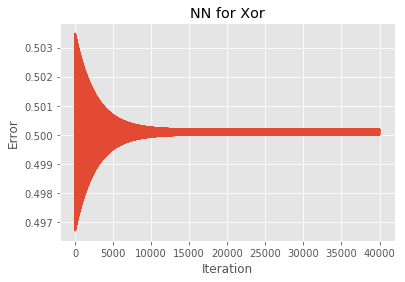

In [6]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

x,y = np.loadtxt('data.csv',
                 unpack=True,
                 delimiter = ',')

plt.plot(x,y)
plt.title('NN for Xor')
plt.ylabel('Error')
plt.xlabel('Iteration')

plt.show()